In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Cargar dataset original
df_partidos = pd.read_csv("partidos_cebollitas.csv")

#Crear variable objetivo
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

#Variables predictoras
X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

#Division estandar: 80% entrenamiento, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.linear_model import LinearRegression

#Instanciar y entrenar modelo
modelo_rl = LinearRegression()
modelo_rl.fit(X_train, y_train)

print("Coeficientes del modelo:", modelo_rl.coef_)
print("Intercepto del modelo:", modelo_rl.intercept_)
print("Precisión del modelo en el conjunto de entrenamiento:", modelo_rl.score(X_train, y_train))
print("Precisión del modelo en el conjunto de prueba:", modelo_rl.score(X_test, y_test))
print("Predicciones en el conjunto de prueba:", modelo_rl.predict(X_test))
print("Predicciones en el conjunto de entrenamiento:", modelo_rl.predict(X_train))
print("Datos de entrenamiento:", X_train.shape, y_train.shape)
print("Datos de prueba:", X_test.shape, y_test.shape)
print("Modelo entrenado exitosamente")


Coeficientes del modelo: [ 0.05596278 -0.05125811]
Intercepto del modelo: -2.5257192572329763
Precisión del modelo en el conjunto de entrenamiento: 0.020655231654285178
Precisión del modelo en el conjunto de prueba: -0.027825140920001656
Predicciones en el conjunto de prueba: [-0.04924273  0.67827347  0.0161294   0.30535267 -0.26368452  0.47324103
 -0.57123319 -0.03983338 -0.09579616 -0.11882624 -0.48283098  0.18872243
 -0.43627754 -0.57123319 -0.01631002  0.02553875 -0.47812631 -0.12823558
  0.09561555 -0.74382621]
Predicciones en el conjunto de entrenamiento: [ 0.02083408  0.0349481   0.23527587  0.17931308  0.3707248  -0.45930762
  0.30535267  0.40316422 -0.63190064 -0.12823558  0.01142473 -0.51997508
 -0.38031476 -0.30553328 -0.1423496   0.42198291 -0.32435197 -0.73912154
 -0.62719597 -0.1794937   0.45912701 -0.37090541  0.35190611 -0.1794937
  0.03024342  0.15157834  0.21224579  0.08620621  0.13746432 -0.20301706
 -0.26838919  0.51038512 -0.51997508 -0.12823558  0.3707248   0.5150

In [4]:
#Mostrar coeficientes e intercepto
print("Coeficientes del modelo :", modelo_rl.coef_)
print("Intercepto del modelo:", modelo_rl.intercept_)

#Interpretacion amigable
for idx, col_name in enumerate(X.columns):
    print(f"Si aumentamos 1 unidad en {col_name}, la diferencia de goles cambia en promedio {modelo_rl.coef_[idx]:.2f}")

Coeficientes del modelo : [ 0.05596278 -0.05125811]
Intercepto del modelo: -2.5257192572329763
Si aumentamos 1 unidad en posesion_local (%), la diferencia de goles cambia en promedio 0.06
Si aumentamos 1 unidad en tiros_arco_local, la diferencia de goles cambia en promedio -0.05


In [6]:
#Hacer predicciones
y_pred = modelo_rl.predict(X_test)

#Comparar predicciones vs valores reales
df_resultados = X_test.copy()
df_resultados['diferencia_goles_real'] = y_test
df_resultados['diferencia_goles_pred'] = y_pred.round(2)

df_resultados.head(10)

,posesion_local (%),tiros_arco_local,diferencia_goles_real,diferencia_goles_pred
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


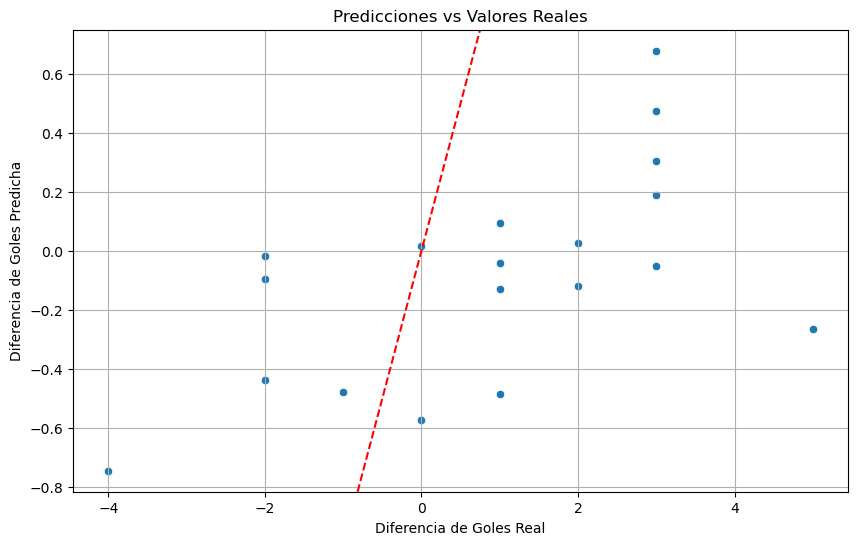

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#Crear grafico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.axline((0,0), slope=1, color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Diferencia de Goles Real')
plt.ylabel('Diferencia de Goles Predicha')
plt.grid()
plt.show()

In [14]:
import ipywidgets as widgets

#Widget de entrada
posesion_input = widgets.FloatSlider(min=30, max=70, step=1, description='Posesion (%)')
tiros_input = widgets.IntSlider(min=0, max=15, step=1,description='Tiros al Arco')

#Funcion de prediccion
def predecir_goles(posesion, tiros):
    #Crear dataframe con nombres de columnas esperados por el modelo
    entrada = pd.DataFrame([[posesion, tiros]], columns=['posesion_local (%)', 'tiros_arco_local'])
    pred = modelo_rl.predict(entrada)[0]
    print(f"Predicción de diferencia de goles: {pred:.2f}")

#Mostrar widget interactivo
widgets.interactive(predecir_goles, posesion=posesion_input, tiros=tiros_input)
poesion_input = widgets.FloatSlider(value=50, min=0, max=100, step=1, description='Posesión Local (%)')
tiros_input = widgets.FloatSlider(value=10, min=0, max=30, step=1, description='Tiros al Arco Local')
display(poesion_input, tiros_input)
display(widgets.interactive(predecir_goles, posesion=poesion_input, tiros=tiros_input))

FloatSlider(value=50.0, description='Posesión Local (%)', step=1.0)

FloatSlider(value=10.0, description='Tiros al Arco Local', max=30.0, step=1.0)

interactive(children=(FloatSlider(value=50.0, description='Posesión Local (%)', step=1.0), FloatSlider(value=1…